In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,792100,0,0,76561199105891071,59,4,1,2.2,"October 31, 2021",Nice for programmers and people who want to be...
1,792100,0,0,Hugomanen,132,2,1,4.8,"October 30, 2021",You kknow how at work you get an interesting p...
2,792100,0,0,meanmotherducker,8,1,1,14.1,"October 21, 2021",Great way to get the creative juices flowing. ...
3,792100,0,0,dallogfheir,38,7,-1,45.6,"October 19, 2021",there are less than 7 billion humans in the game
4,792100,0,0,PR0C3DVR4L,680,44,1,7.0,"October 10, 2021","Programming puzzles, love'em!!!"


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,2.2,"October 31, 2021",Nice for programmers and people who want to be...
1,0,0,1,4.8,"October 30, 2021",You kknow how at work you get an interesting p...
2,0,0,1,14.1,"October 21, 2021",Great way to get the creative juices flowing. ...
3,0,0,-1,45.6,"October 19, 2021",there are less than 7 billion humans in the game
4,0,0,1,7.0,"October 10, 2021","Programming puzzles, love'em!!!"


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,2.2,1
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,4.8,1
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,14.1,1
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,45.6,-1
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,7.0,1
5,"October 7, 2021","Хорошая головоломка на составление алгоритмов,...",0,0,2.8,1
6,"October 2, 2021","this is a fantastic game - fun, challenging, a...",0,0,41.1,1
7,"September 12, 2021",7 Billion Humans is a much improved sequel to ...,0,0,22.5,1
8,"August 23, 2021","Cute, not too difficult, and all around good f...",0,0,59.2,1
9,"August 6, 2021",Hilariously fun way to learn basic programming...,2,0,10.5,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  544 non-null    object 
 1   Review_Text     544 non-null    object 
 2   Num_Helpful     544 non-null    int64  
 3   Num_Funny       544 non-null    int64  
 4   Hours_Played    544 non-null    float64
 5   Recommend       544 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 25.6+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_764/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,2.2,1,1635638400
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,4.8,1,1635552000
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,14.1,1,1634774400
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,45.6,-1,1634601600
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,7.0,1,1633824000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_764/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,2.2,1,1635638400,2704
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,4.8,1,1635552000,2704
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,14.1,1,1634774400,2703
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,45.6,-1,1634601600,2702
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,7.0,1,1633824000,2701


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,2.2,1,1635638400,2704
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,4.8,1,1635552000,2704
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,14.1,1,1634774400,2703
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,45.6,-1,1634601600,2702
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,7.0,1,1633824000,2701


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 31, 2021",Nice for programmers and people who want to be...
1,2704,"October 30, 2021",You kknow how at work you get an interesting p...
2,2703,"October 21, 2021",Great way to get the creative juices flowing. ...
3,2702,"October 19, 2021",there are less than 7 billion humans in the game
4,2701,"October 10, 2021","Programming puzzles, love'em!!!"


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2538,"August 23, 2018",18
1,2538,"August 24, 2018",11
2,2538,"August 25, 2018",8
3,2538,"August 26, 2018",13
4,2538,"August 27, 2018",11
...,...,...,...
309,2701,"October 7, 2021",1
310,2702,"October 19, 2021",1
311,2703,"October 21, 2021",1
312,2704,"October 30, 2021",1


<AxesSubplot:>

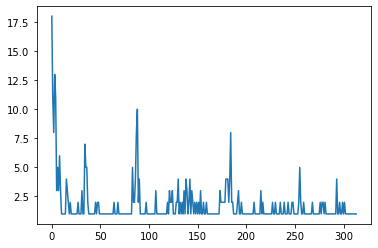

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

544

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.732484076433121

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2538,69
1,2539,14
2,2540,12
3,2541,6
4,2542,2
...,...,...
129,2700,1
130,2701,2
131,2702,1
132,2703,1


<AxesSubplot:>

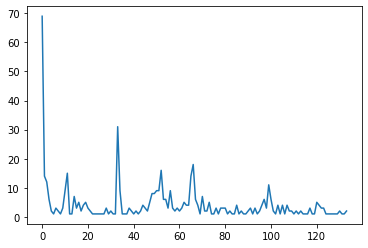

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

544

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

4.059701492537314

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,2.2,1,1635638400,2704
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,4.8,1,1635552000,2704
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,14.1,1,1634774400,2703
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,45.6,-1,1634601600,2702
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,7.0,1,1633824000,2701


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2538,476
1,2539,23
2,2540,52
3,2541,13
4,2542,3
...,...,...
129,2700,0
130,2701,0
131,2702,0
132,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2538,83,0,1.0,6.898551
2539,7,0,1.0,1.642857
2540,23,0,1.0,4.333333
2541,6,0,1.5,2.166667
2542,2,1,1.5,1.500000
...,...,...,...,...
2700,0,0,0.0,0.000000
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1618

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

2.974264705882353

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2538,328
1,2539,9
2,2540,25
3,2541,6
4,2542,13
...,...,...
129,2700,0
130,2701,0
131,2702,0
132,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2538,196,0,0.0,4.753623
2539,7,0,0.0,0.642857
2540,24,0,0.0,2.083333
2541,3,0,0.5,1.000000
2542,13,0,6.5,6.500000
...,...,...,...,...
2700,0,0,0.0,0.000000
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

737

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

1.3547794117647058

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2538,880.1
1,2539,404.1
2,2540,305.1
3,2541,117.2
4,2542,28.1
...,...,...
129,2700,41.1
130,2701,9.8
131,2702,45.6
132,2703,14.1


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2538,52.3,0.4,8.60,12.755072
2539,96.5,0.7,19.75,28.864286
2540,80.7,1.8,12.20,25.425000
2541,52.0,1.0,12.65,19.533333
2542,17.5,10.6,14.05,14.050000
...,...,...,...,...
2700,41.1,41.1,41.10,41.100000
2701,7.0,2.8,4.90,4.900000
2702,45.6,45.6,45.60,45.600000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

12582.900000000001

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

23.13033088235295

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2538,0.855072
1,2539,0.857143
2,2540,0.833333
3,2541,0.666667
4,2542,1.000000
...,...,...
129,2700,1.000000
130,2701,1.000000
131,2702,-1.000000
132,2703,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2538,1,-1,1.0,0.855072
2539,1,-1,1.0,0.857143
2540,1,-1,1.0,0.833333
2541,1,-1,1.0,0.666667
2542,1,1,1.0,1.000000
...,...,...,...,...
2700,1,1,1.0,1.000000
2701,1,1,1.0,1.000000
2702,-1,-1,-1.0,-1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

476

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.875

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,2.2,1,1635638400,2704
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,4.8,1,1635552000,2704
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,14.1,1,1634774400,2703
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,45.6,-1,1634601600,2702
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,7.0,1,1633824000,2701


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,0.002667,1.0,1.000000,2704
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,0.005969,1.0,0.999142,2704
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,0.017780,1.0,0.991416,2703
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,0.057785,0.0,0.989700,2702
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,0.008763,1.0,0.981974,2701
...,...,...,...,...,...,...,...,...
539,"April 2, 2020",If you like Human Resource Machine or other pr...,7,0,0.320041,1.0,0.504721,2622
540,"April 1, 2020",Concurrency at its best,0,0,0.009017,1.0,0.503863,2621
541,"March 30, 2020",Another great puzzle game by Tomorrow Corp. Ca...,1,0,0.033528,1.0,0.502146,2621
542,"March 25, 2020",its good,0,0,0.013716,1.0,0.497854,2620


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_764/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",Nice for programmers and people who want to be...,0,0,0.002667,1.0,1.000000,2704
1,"October 30, 2021",You kknow how at work you get an interesting p...,0,0,0.005969,1.0,0.999142,2704
2,"October 21, 2021",Great way to get the creative juices flowing. ...,0,0,0.017780,1.0,0.991416,2703
3,"October 19, 2021",there are less than 7 billion humans in the game,0,0,0.057785,0.0,0.989700,2702
4,"October 10, 2021","Programming puzzles, love'em!!!",0,0,0.008763,1.0,0.981974,2701
5,"October 7, 2021",",",0,0,0.003429,1.0,0.979399,2701
6,"October 2, 2021","this is a fantastic game - fun, challenging, a...",0,0,0.052070,1.0,0.975107,2700
7,"September 12, 2021",7 Billion Humans is a much improved sequel to ...,0,0,0.028448,1.0,0.957940,2697
8,"August 23, 2021","Cute, not too difficult, and all around good f...",0,0,0.075057,1.0,0.940773,2694
9,"August 6, 2021",Hilariously fun way to learn basic programming...,2,0,0.013208,1.0,0.926180,2692


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2538    [I did parallel programming at a post-grad lev...
2539    [A really great game. It has a great comcept a...
2540    [Cute, I can't feel the Computer Science degre...
2541    [Put an option for completely muting the game....
2542    [Good game, with puzzles ranging from very eas...
2543    [Great game!Really enjoyed the puzzles and the...
2545    [Are you a logician? Or maybe a budding progra...
2546    [Good game to emulate programming, Very good f...
2547    [Not an easy challenge. Expect to spend many w...
2549    [It's Human Resource Machine, now with multith...
2550    [Another great programming puzzle game. Makes ...
2551    [This game is arguably much more challenging t...
2553    [I 100% this game in 11 hours of purchasing. I...
2554    [Plenty of fun, levels, puzzles and brain work...
2555    [The game play is good. The quests in game are...
2556    [I wonder how many players tried to pick up th...
2557    [The game is great, but seriously, a volume co..

In [52]:
# storing data in JSON format
df_text_list.to_json('sevenbil_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('sevenbil_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2538  [I did parallel programming at a post-grad lev...
1    Review_Text   2539  [A really great game. It has a great comcept a...
2    Review_Text   2540  [Cute, I can't feel the Computer Science degre...
3    Review_Text   2541  [Put an option for completely muting the game....
4    Review_Text   2542  [Good game, with puzzles ranging from very eas...
5    Review_Text   2543  [Great game!Really enjoyed the puzzles and the...
6    Review_Text   2545  [Are you a logician? Or maybe a budding progra...
7    Review_Text   2546  [Good game to emulate programming, Very good f...
8    Review_Text   2547  [Not an easy challenge. Expect to spend many w...
9    Review_Text   2549  [It's Human Resource Machine, now with multith...
10   Review_Text   2550  [Another great programming puzzle game. Makes ...
11   Review_Text   2551  [This game is arguably much more challenging t...
12   Review_Text   2553  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('sevenbil_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_764/344560322.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('sevenbil_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_764/1872206735.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('sevenbil_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])